In [1]:
# import packages that we need
import pandas as pd
import numpy as np
import keras
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import RMSprop
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import io
import random
import shutil
from PIL import Image


import time
from tqdm import tqdm

In [2]:
DATADIR = r'C:\Users\Donny Harahap\OneDrive\Dokumen\Google Bangkit\Capstone'
CATEGORIES = ['Clostridium.perfringens', 'Enterococcus.faecium','Escherichia.coli','Fusobacterium','Lactobacillus.crispatus','Acinetobacter.baumanii','Bacteroides.fragilis',]
#CATEGORIES = ['Abutilon Hybridum','Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 'Anthurium Scherzerianum', 'Aporocactus Flagelliformis', 'Basella Alba (Basale)', 'Calathea Crocata', 'daisy', 'dandelion', 'Ficus Religiosa (Peepal Tree)', 'Hibiscus rosa-sinensis', 'Lithops fulleri', 'Lithops optica _Rubra_', 'Lithops pseudotruncatella', 'Moringa Oleifera (Drumstick)', 'Nerium Oleander (Oleander)', 'Ocimum Tenuiflorum (Tulsi)', 'Pachystachys Lutea', 'Paphiopedilum Venustum', 'Peperomia Argyela', 'Phalaenopsis amabilis', 'Plectranthus Amboinicus (Mexican Mint)', 'Punica Granatum (Pomegranate)', 'rose', 'Schlumbergera Bridgesii', 'Strelitzia Reginae', 'sunflower', 'Trigonella Foenum-graecum (Fenugreek)', 'tulip', 'Asplenium Nidus', 'Calathea Roseopicta', 'Calathea Zebrina', 'Chlorophytum Comosum', 'Davallia Fejeensis', 'Ficus Auriculata (Roxburgh fig)', 'Mentha (Mint)', 'Nephrolepis Exaltata', 'Opuntia Microdasys', 'Pilea Cadierei', 'Piper Betle (Betel)', 'Santalum Album (Sandalwood)', 'Sedum Morganianum', 'Monstera Deliciosa', 'snow white aglaonema']

In [3]:
source_path = r'C:\Users\Donny Harahap\OneDrive\Dokumen\Google Bangkit\Capstone'

source_path_dogs = os.path.join(source_path, 'Clostridium.perfringens')
source_path_cats = os.path.join(source_path, 'Enterococcus.faecium')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of Clostridium.perfringens.")
print(f"There are {len(os.listdir(source_path_cats))} images of Enterococcus.faecium.")

There are 23 images of Clostridium.perfringens.
There are 20 images of Enterococcus.faecium.


In [4]:
# Define root directoryeifera (Drumstick)', 'Nerium Oleander (Oleander)', 'Ocimum Tenuiflorum (Tulsi)', 'Pachystachys Lutea', 'Paphiopedilum Venustum', 'Peperomia Argyela', 'Phalaenopsis amabilis', 'Plectranthus Amboinicus (Mexican Mint)', 'Punica Granatum (Pomegranate)', 'rose', 'Schlumbergera Bridgesii', 'Strelitzia Reginae', 'sunflower', 'Trigonella Foenum-graecum (Fenugreek)', 'tulip', 'Asplenium Nidus', 'Calathea Roseopicta', 'Calathea Zebrina', 'Chlorophytum Comosum', 'Davallia Fejeensis', 'Ficus Auriculata (Roxburgh fig)', 'Mentha (Mint)', 'Nephrolepis Exaltata', 'Opuntia Microdasys', 'Pilea Cadierei', 'Piper Betle (Betel)', 'Santalum Album (Sandalwood)', 'Sedum Morganianum', 'Monstera Deliciosa', 'snow white aglaonema']
root_dir = r'C:\Users\Donny Harahap\Capstone'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_test_dirs
def create_train_test_dirs(root_path):

  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter
  train_dir = os.path.join(root_path, 'training')
  os.makedirs(train_dir)
  validation_dir = os.path.join(root_path, 'validation')
  os.makedirs(validation_dir)
  test_dir = os.path.join(root_path, 'testing')
  os.makedirs(test_dir)
  # Directory with training cat/dog pictures
  for bakteri in CATEGORIES:
        os.makedirs(os.path.join(train_dir, bakteri))

  # Directory with validation cat/dog pictures
  for bakteri in CATEGORIES:
        os.makedirs(os.path.join(validation_dir, bakteri))
  for bakteri in CATEGORIES:
        os.makedirs(os.path.join(test_dir, bakteri))


  
try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
# Test your create_train_test_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

C:\Users\Donny Harahap\Capstone\testing
C:\Users\Donny Harahap\Capstone\training
C:\Users\Donny Harahap\Capstone\validation
C:\Users\Donny Harahap\Capstone\testing\Acinetobacter.baumanii
C:\Users\Donny Harahap\Capstone\testing\Bacteroides.fragilis
C:\Users\Donny Harahap\Capstone\testing\Clostridium.perfringens
C:\Users\Donny Harahap\Capstone\testing\Enterococcus.faecium
C:\Users\Donny Harahap\Capstone\testing\Escherichia.coli
C:\Users\Donny Harahap\Capstone\testing\Fusobacterium
C:\Users\Donny Harahap\Capstone\testing\Lactobacillus.crispatus
C:\Users\Donny Harahap\Capstone\training\Acinetobacter.baumanii
C:\Users\Donny Harahap\Capstone\training\Bacteroides.fragilis
C:\Users\Donny Harahap\Capstone\training\Clostridium.perfringens
C:\Users\Donny Harahap\Capstone\training\Enterococcus.faecium
C:\Users\Donny Harahap\Capstone\training\Escherichia.coli
C:\Users\Donny Harahap\Capstone\training\Fusobacterium
C:\Users\Donny Harahap\Capstone\training\Lactobacillus.crispatus
C:\Users\Donny Haraha

In [6]:
# GRADED FUNCTION: split_data
def split_data(SOURCE, TRAINING, VALIDATION, TESTING, SPLIT_SIZE1, SPLIT_SIZE2):

  ### START CODE HERE
  #os.path.getsize(PATH)
    list_name = os.listdir(SOURCE)
    random.sample(list_name, len(list_name))
  


    part1 = int(len(list_name) * SPLIT_SIZE1)
    training_file = list_name[:part1]
    PREtesting_file =list_name[part1:]
    part2 = int(len(PREtesting_file) * SPLIT_SIZE2)
    validation_file = PREtesting_file[:part2]
    testing_file =PREtesting_file[part2:]

    for file in training_file:
        copyfile(os.path.join(SOURCE, file), os.path.join(TRAINING, file))
    for file in validation_file:
        copyfile(os.path.join(SOURCE, file), os.path.join(VALIDATION, file))
    for file in testing_file:
        copyfile(os.path.join(SOURCE, file), os.path.join(TESTING, file))
#      copyfile(SOURCE+file, TESTING+file)

  ### END CODE HERE


In [7]:
TRAINING_DIR = r"C:\Users\Donny Harahap\Capstone\training"
VALIDATION_DIR = r"C:\Users\Donny Harahap\Capstone\validation"
TESTING_DIR = r"C:\Users\Donny Harahap\Capstone\testing"

for bakteri in CATEGORIES:
    if len(os.listdir(os.path.join(TRAINING_DIR, bakteri))) > 0:
        for file in os.scandir(os.path.join(TRAINING_DIR, bakteri)):
            os.remove(file.path)
    if len(os.listdir(os.path.join(VALIDATION_DIR, bakteri))) > 0:
        for file in os.scandir(os.path.join(VALIDATION_DIR, bakteri)):
            os.remove(file.path)
    if len(os.listdir(os.path.join(TESTING_DIR, bakteri))) > 0:
        for file in os.scandir(os.path.join(TESTING_DIR, bakteri)):
            os.remove(file.path)

# Define proportion of images used for training
split_size1 = .8
split_size2 = 0.5
# Run the function
# NOTE: Messages about zero length images should be printed out
for bakteri in CATEGORIES:
    split_data(os.path.join(source_path, bakteri), os.path.join(TRAINING_DIR, bakteri), os.path.join(VALIDATION_DIR, bakteri), os.path.join(TESTING_DIR, bakteri), split_size1, split_size2)
    


In [8]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                     rotation_range=20,
                                     width_shift_range=.0,
                                     height_shift_range=.0,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode="nearest")

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=25,
                                                      class_mode='categorical',
                                                      target_size=(224, 224), color_mode='rgb')

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1/255.0)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=25,
                                                                class_mode='categorical',
                                                                target_size=(224, 224),
                                                                color_mode='rgb')
  ### END CODE HERE
  return train_generator, validation_generator

In [9]:
def color_segment_function(img_array):
    img_array= np.rint(img_array)
    img_array= img_array.astype('uint8')
    hsv_img= cv2.cvtColor(img_array, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv_img, (24, 50, 0), (55, 255, 255))
    result = cv2.bitwise_and(img_array, img_array, mask=mask)
    result= result.astype('float64')
    return result

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=color_segment_function)
test_generator = test_datagen.flow_from_directory(r'C:\Users\Donny Harahap\OneDrive\Dokumen\Google Bangkit\Capstone\bakteri\testing',
                                                  target_size=(224, 224),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 126 images belonging to 2 classes.


In [11]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 118 images belonging to 7 classes.
Found 14 images belonging to 7 classes.


In [12]:
class_names = list(train_generator.class_indices.keys())
class_names

['Acinetobacter.baumanii',
 'Bacteroides.fragilis',
 'Clostridium.perfringens',
 'Enterococcus.faecium',
 'Escherichia.coli',
 'Fusobacterium',
 'Lactobacillus.crispatus']

In [ ]:
#from prettytable import PrettyTable
#get class indices and labels. calculate class weight
#label_map = {}
#for k, v in train_generator.class_indices.items():
 #   label_map[v]=k

#class_counts= pd.Series(train_generator.classes).value_counts()
#class_weight= {}

#for i, c in class_counts.items():
 #   class_weight[i]= 1.0/c
    
#norm_factor= np.mean(list(class_weight.values()))

#for k in class_counts.keys():
 #   class_weight[k]= class_weight[k]/norm_factor

#t = PrettyTable(['class_index', 'class_label', 'class_weight'])
#for i in sorted(class_weight.keys()):
 #   t.add_row([i, label_map[i], '{:.2f}'.format(class_weight[i])])
#print(t)

In [14]:
# base_model = tf.keras.applications.MobileNetV2(include_top=False)
# base_model.trainable= False

# inputs = layers.Input(shape=(224,224,3),name = "input_shape",dtype=tf.float16)
# x = base_model(inputs,training=False)
# x = layers.GlobalAvgPool2D(name="global_average_pooling_layer")(x)
# #x = layers.Dense(512, activation='relu')(x)
# outputs = layers.Dense(len(class_names),activation='softmax',dtype=tf.float32,name='outputs')(x)

# model_2 = Model(inputs,outputs)

# model_2.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

# model_2.summary()

In [13]:
base_model = tf.keras.applications.MobileNetV2(include_top=False)
base_model.trainable= False

inputs = layers.Input(shape=(224,224,3),name = "input_shape",dtype=tf.float16)
x = base_model(inputs,training=False)
x = layers.GlobalAvgPool2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(len(class_names),activation='softmax',dtype=tf.float32,name='outputs')(x)

model= Model(inputs,outputs)

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_shape (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, None, None, 1280)  2257984   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
outputs (Dense)              (None, 7)                 8967      
Total params: 2,266,951
Trainable params: 8,967
Non-trainable params: 2,257,984
_________________________________________________________________


In [65]:
# from tensorflow.keras import layers
# model =  tf.keras.models.Sequential()

# model.add(layers.Conv2D(32, (3, 3), input_shape=(224, 224, 3),padding='Same', activation='relu'))
# model.add(layers.MaxPool2D(pool_size=2 , strides=2))
# model.add(layers.Dropout(0.1))


# model.add(layers.Conv2D(64, (3, 3),padding='Same' , activation='relu'))
# model.add(layers.MaxPool2D(pool_size=2 , strides=2))
# model.add(layers.Dropout(0.1))



# model.add(layers.Conv2D(128, (3, 3),padding='Same', activation='relu'))
# model.add(layers.MaxPool2D(pool_size=2 , strides=2))
# #model.add(layers.Dropout(0.1))


# model.add(layers.Conv2D(128, (3, 3),padding='Same', activation='relu'))
# model.add(layers.MaxPool2D(pool_size=2 , strides=2))
# #model.add(layers.Dropout(0.1))


# model.add(layers.Flatten())
# model.add(layers.Dropout(0.4))
# model.add(layers.Dense(256, activation='relu'))

# model.add(layers.Dense(len(CATEGORIES), activation='softmax'))


# base_model = tf.keras.applications.MobileNetV2(include_top=False)
# base_model.trainable= False

# inputs = layers.Input(shape=(224,224,3),name = "input_shape",dtype=tf.float16)
# x = base_model(inputs,training=False)
# x = layers.GlobalAvgPool2D(name="global_average_pooling_layer")(x)
# #x = layers.Dense(512, activation='relu')(x)
# outputs = layers.Dense(len(class_names),activation='softmax',dtype=tf.float32,name='outputs')(x)

# model_2 = Model(inputs,outputs)




In [66]:
# model.compile(optimizer=keras.optimizers.Adam(lr=0.001, amsgrad=True),
#                     loss='categorical_crossentropy',
#                     metrics = ['accuracy']) 

In [ ]:
# model.summary()

In [68]:
# Opsi callBack1

# class MyThresholdCallback(tf.keras.callbacks.Callback):
#     def __init__(self, threshold):
#         super(MyThresholdCallback, self).__init__()
#         self.threshold = threshold

#     def on_epoch_end(self, epoch, logs=None): 
#         val_acc = logs["val_loss"]
#         if val_acc <= self.threshold:
#             self.model.stop_training = True

# # callback_model2 = ModelCheckpoint("checkpoint_all/model2_45Data_trad.h5")

# my_callback = MyThresholdCallback(threshold=0.5)

In [19]:
# Opsi callBack2
# best_cb= callbacks.ModelCheckpoint('model_best29Mei.h5', 
#                                          monitor='val_loss', 
#                                          verbose=1, 
#                                          save_best_only=True, 
#                                          save_weights_only=False, 
#                                          mode='auto', 
#                                          period=1)

In [14]:
# epochs = 150
# steps_per_epoch = 50
# Train the model
# Note that this may take some time.

history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/10
5/5 [==============================] - 5s 914ms/step - loss: 2.0605 - accuracy: 0.1610 - val_loss: 1.5875 - val_accuracy: 0.3571
Epoch 2/10
5/5 [==============================] - 3s 608ms/step - loss: 1.3430 - accuracy: 0.5508 - val_loss: 1.1519 - val_accuracy: 0.6429
Epoch 3/10
5/5 [==============================] - 3s 603ms/step - loss: 0.9049 - accuracy: 0.8136 - val_loss: 0.8207 - val_accuracy: 0.9286
Epoch 4/10
5/5 [==============================] - 3s 597ms/step - loss: 0.7224 - accuracy: 0.8898 - val_loss: 0.6264 - val_accuracy: 0.9286
Epoch 5/10
5/5 [==============================] - 3s 605ms/step - loss: 0.5097 - accuracy: 0.8898 - val_loss: 0.5158 - val_accuracy: 0.9286
Epoch 6/10
5/5 [==============================] - 3s 597ms/step - loss: 0.4132 - accuracy: 0.9237 - val_loss: 0.4295 - val_accuracy: 0.9286
Epoch 7/10
5/5 [==============================] - 3s 603ms/step - loss: 0.3712 - accuracy: 0.9237 - val_loss: 0.3855 - val_accuracy: 0.8571
Epoch 8/10
5/5 [====

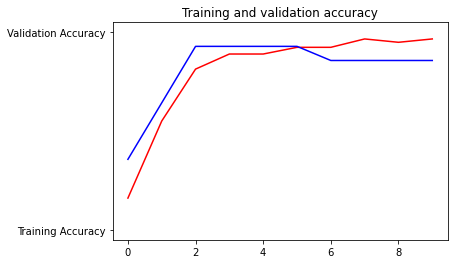

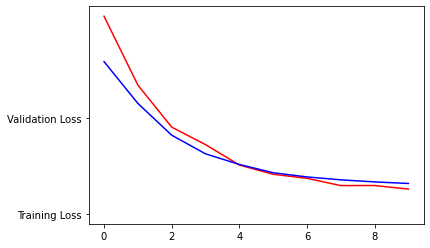

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs
#------------------------------------------------
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [16]:
model.save('model_best1Juni.h5')

In [17]:
from keras import models, layers, callbacks
model= models.load_model('model_best1Juni.h5')

In [18]:
test_generator.n

126

In [19]:
model.evaluate(validation_generator)

1/1 [==============================] - 0s 0s/step - loss: 0.3173 - accuracy: 0.8571


[0.3172517716884613, 0.8571428656578064]

In [ ]:
# import cv2
# pred= model.predict_generator(test_generator, steps= test_generator.n, verbose=1)

In [ ]:
# predicted_class_indices=np.argmax(pred,axis=1)

# prediction_labels = [label_map[k] for k in predicted_class_indices]
# filenames= test_generator.filenames

In [ ]:
# import csv
# csvfile= open('ray_reed_submission.csv', 'w', newline='')
# writer= csv.writer(csvfile)

# headers= ['file', 'species']

# writer.writerow(headers)
# t = PrettyTable(headers)
# for i, f, p in zip(range(len(filenames)), filenames, prediction_labels):
#     writer.writerow([os.path.basename(f),p])
#     if i <10:
#         t.add_row([os.path.basename(f), p])
#     elif i<13:
#         t.add_row(['.', '.'])
# csvfile.close()
# print(t)

In [20]:
def img_prep_predict(path):
    img = plt.imread(path)
    img=tf.image.resize(img,(224,224))
    img=tf.expand_dims(img,axis=0)
    img = img/255.
    predmod = np.ravel(model.predict(img))
    a= 0
    nji = 0
    for CATEGORIE in CATEGORIES:
        if predmod[a] > nji:
            mosnt = CATEGORIE
            nji = predmod[a]
        a+=1

    return mosnt

In [27]:
img_prep_predict(R"C:\Users\Donny Harahap\Downloads\tes eschericia coli.jpg")

'Escherichia.coli'

In [28]:
def img_prep_predict(path):
    img = plt.imread(path)
    img=tf.image.resize(img,(224,224))
    img=tf.expand_dims(img,axis=0)
    img = img/255.
    return img